In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os 
import matplotlib.pyplot as plt


In [4]:
main_fol = r"C:\Users\Visweswaran\Downloads\waste management\garbage_classification"

In [2]:
categorical = os.listdir(r'C:\Users\Visweswaran\Downloads\waste management\garbage_classification')

In [3]:
print("The no of classes : ",len(categorical)) 

The no of classes :  12


In [5]:
print(categorical)

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [8]:
waste_image = []
waste_classes = []

for classs in categorical:
    fol_join = os.path.join(main_fol,classs)
    index = categorical.index(classs)

    for img in os.listdir(fol_join):
        fols_join = os.path.join(fol_join,img)
        image = cv2.imread(fols_join)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(150,150))
        waste_image.append(image)
        waste_classes.append(index)
    
    

In [9]:
waste_image = np.array(waste_image)
waste_classes = np.array(waste_classes)

In [10]:
waste_image_normalization = waste_image/255.0

Text(0.5, 1.0, 'battery')

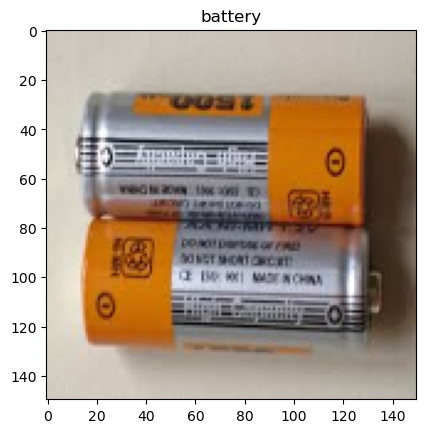

In [13]:
plt.imshow(waste_image_normalization[0])
plt.title(categorical[waste_classes[0]])

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(waste_image_normalization,waste_classes,test_size=0.1,random_state=3)

In [18]:
print(f"Training data shape of x {x_train.shape} and y {y_train.shape}")
print(f"Testing data shape of x {x_test.shape} and y {y_test.shape}")

Training data shape of x (13963, 150, 150, 3) and y (13963,)
Testing data shape of x (1552, 150, 150, 3) and y (1552,)


In [21]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
num_classes = 12
input_shape = (150, 150, 3)  # InceptionV3 requires at least 75x75, typically 299x299

# Load base model without top
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_94 (Conv2D)            │ (None, 74, 74, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_94        │ (None, 74, 74, 32)        │              96 │ conv2d_94[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_94 (Activation)    │ (None, 74, 74, 32)        │               0 │ batch_normalization_94[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_95 (Conv2D)            │ (None, 72, 72, 32)        │           9,216 │ activation_94[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_95        │ (None, 72, 72, 32)        │              96 │ conv2d_95[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_95 (Activation)    │ (None, 72, 72, 32)        │               0 │ batch_normalization_95[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_96 (Conv2D)            │ (None, 72, 72, 64)        │          18,432 │ activation_95[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_96        │ (None, 72, 72, 64)        │             192 │ conv2d_96[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_96 (Activation)    │ (None, 72, 72, 64)        │               0 │ batch_normalization_96[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 35, 35, 64)        │               0 │ activation_96[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_97 (Conv2D)            │ (None, 35, 35, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_97        │ (None, 35, 35, 80)        │             240 │ conv2d_97[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_97 (Activation)    │ (None, 35, 35, 80)        │               0 │ batch_normalization_97[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_98 (Conv2D)            │ (None, 33, 33, 192)       │         138,24

 Total params: 23,913,260 (91.22 MB)

 Trainable params: 2,110,476 (8.05 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [22]:
history = model.fit(x_train,y_train,epochs=20,batch_size = 32,validation_data = (x_test,y_test))

Epoch 1/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 129s 252ms/step - accuracy: 0.6934 - loss: 1.2674 - val_accuracy: 0.8647 - val_loss: 0.4334
Epoch 2/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 104s 237ms/step - accuracy: 0.8288 - loss: 0.5379 - val_accuracy: 0.8718 - val_loss: 0.3988
Epoch 3/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 102s 234ms/step - accuracy: 0.8503 - loss: 0.4572 - val_accuracy: 0.8686 - val_loss: 0.4037
Epoch 4/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 103s 236ms/step - accuracy: 0.8608 - loss: 0.4314 - val_accuracy: 0.8769 - val_loss: 0.4025
Epoch 5/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 104s 238ms/step - accuracy: 0.8730 - loss: 0.3884 - val_accuracy: 0.8769 - val_loss: 0.3827
Epoch 6/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 102s 234ms/step - accuracy: 0.8793 - loss: 0.3691 - val_accuracy: 0.8956 - val_loss: 0.3483
Epoch 7/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 104s 237ms/step - accuracy: 0.8886 - loss: 0.3361 - val_accuracy: 0.8802 - val_loss: 0.3774
Epoch 8/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 103s 235ms/step - accuracy: 0.8914 -

In [25]:
loss, accuracy = model.evaluate(x_test,y_test)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.8951 - loss: 0.3389
Validation Loss: 0.3490
Validation Accuracy: 0.8943


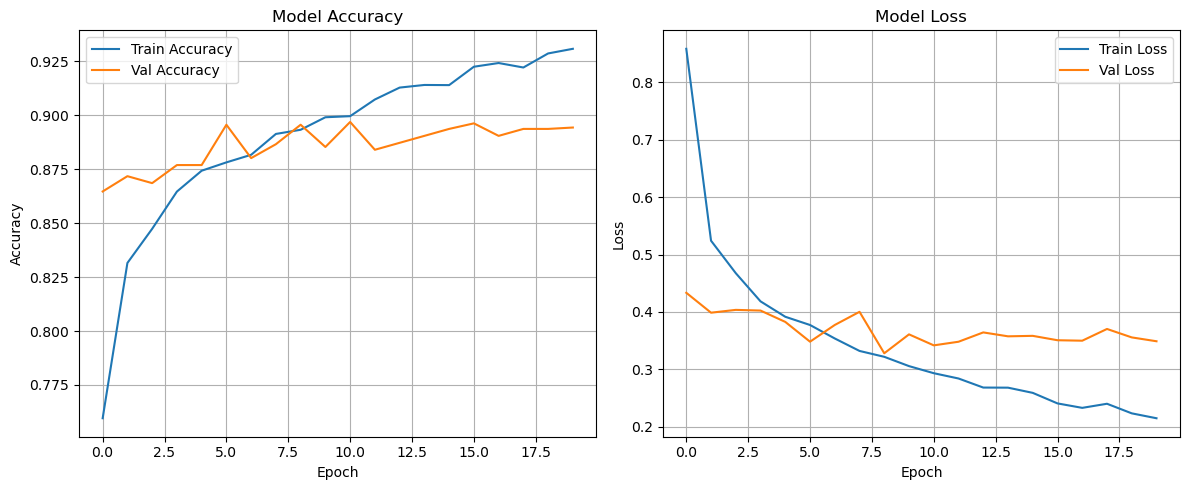

In [29]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [33]:
def custom_function(path_image):
    image = cv2.imread(path_image)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(150,150))
    image = image/255.0
    image = np.expand_dims(image,axis=0)

    prediction = model.predict(image)
    prediction = np.argmax(prediction)

    plt.imshow(image[0])
    plt.title(categorical[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


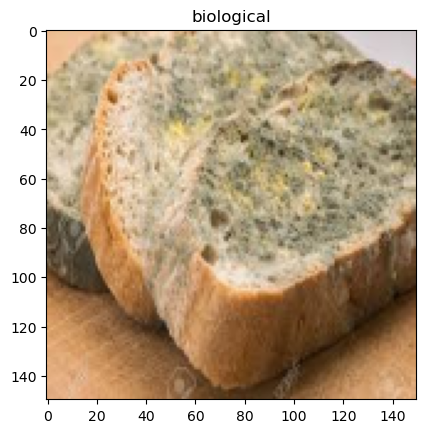

In [45]:
custom_function(r"C:\Users\Visweswaran\Downloads\waste management\garbage_classification\biological\biological99.jpg")

In [47]:
model.save('inceptionv3_waste.h5')